In [2]:
%run GUIanaliza.py
%run velikaMestaEvrope.py
import pandas as pd
import matplotlib.pyplot as plt
import plotly.plotly as py

plt.rcParams['figure.figsize'] = (15, 5) # Nastavitev velikosti grafon
pd.options.display.max_rows = 8 # Nastavitev maks. št. prikazanih vrstic v tabeli

Datoteke že obstajajo.


# Analiza krajev glede na temperaturne značilnosti
#### PROJEKTNA NALOGA PRI PROGRAMIRANJU 1

Podatki so bili zajeti iz sledečih spletnih strani:
http://www.weatherbase.com/
država, mesto,  id, povprečne temperature po posameznih mesecih;
https://www.countries-ofthe-world.com/capitals-of-europe.html:
seznam Evropskih držav z njihovimi prestolnicami.

## 1. del: Analiza glavnih mest evropskih drzav

1.1) Uvoz osnovnih tabel s podatki in njihov pregled:

In [3]:
Prestolnice = pd.read_csv('CSVdatoteke\\PrestolniceDrzav.txt', encoding='latin1')
Temperature = pd.read_csv('CSVdatoteke\\Temperature.txt', encoding='latin1')
Padavine = pd.read_csv('CSVdatoteke\\Padavine.txt', encoding='latin1')
Ekstremi = pd.read_csv('CSVdatoteke\\Ekstremi.txt', encoding='latin1')

Prva tabela vsebuje imena Europskih držav in njihovih glavnig mest.

In [4]:
Prestolnice

,MESTO,Drzava,sifra
0,Brussels,Belgium,15460
1,Vaduz,Liechtenstein,528523
2,Riga,Latvia,22462
3,Podgorica,Montenegro,167041
...,...,...,...
37,Amsterdam,Netherlands,4260
38,Ljubljana,Slovenia,41031
39,Copenhagen,Denmark,8160
40,Monte Carlo,Monaco,528525


Druga tabela prikazuje podatke o povprečnih mesečnih in letni temperaturi posameznih mest iz gornje tabele.

In [5]:
Temperature

,sifra,januar,februar,marec,april,maj,junij,julij,avgust,september,oktober,november,december,letno povprecje temperatur
0,15460,3.3,3.3,6.7,8.9,12.8,15.6,17.8,17.8,15.0,11.1,6.7,4.4,10.28
1,528523,2.3,0.0,0.9,6.0,9.4,13.8,16.2,18.8,18.2,15.5,11.3,4.9,9.78
2,22462,-3.3,-3.3,0.6,5.6,11.7,15.6,17.2,16.7,12.2,7.2,2.8,-1.7,6.78
3,167041,5.6,5.6,10.0,15.0,17.8,23.9,26.1,27.8,22.2,17.2,11.7,7.2,15.84
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37,4260,3.3,2.8,6.1,8.3,12.2,15.0,16.7,16.7,14.4,10.6,6.7,4.4,9.77
38,41031,-1.1,0.6,5.0,8.3,13.9,16.7,19.4,18.9,15.6,10.0,3.3,0.0,9.22
39,8160,0.6,0.0,2.8,6.1,11.7,15.0,16.7,16.7,13.3,9.4,5.0,2.2,8.29
40,528525,8.4,7.2,8.5,10.4,12.9,16.5,20.0,22.8,22.8,20.2,16.1,11.5,14.77


Tretja tabela prikazuje podatke o povprečnih mesečnih in letni količini padavin posameznih mest iz gornje tabele.

In [6]:
Padavine

,sifra,januar,februar,marec,april,maj,junij,julij,avgust,september,oktober,november,december,letno povprecje padavin
0,15460,3.2,2.0,3.2,2.1,2.9,2.9,2.3,1.7,2.7,3.3,2.4,2.7,3.0
1,528523,2.1,2.1,1.8,2.1,2.8,3.6,4.6,4.9,4.6,3.5,2.8,2.7,3.0
2,22462,1.3,0.9,1.0,1.4,1.7,2.3,2.8,2.7,2.6,2.1,2.0,1.5,2.0
3,167041,3.3,5.8,4.4,4.6,3.4,1.6,1.8,1.7,3.3,5.3,8.2,7.2,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37,4260,3.1,1.7,3.5,1.5,2.0,2.4,2.9,2.4,3.2,4.1,3.0,2.8,3.0
38,41031,1.6,1.6,1.6,2.0,2.0,2.0,2.0,2.0,2.4,2.8,2.8,2.0,2.0
39,8160,1.7,1.0,1.4,1.6,1.7,2.1,2.6,2.9,2.0,2.1,2.1,2.0,2.0
40,528525,3.5,3.0,2.9,2.9,2.5,1.9,1.5,0.7,1.2,2.6,4.4,4.6,3.0


In [7]:
Ekstremi

,sifra,minimalna T,maksimalna T,standardni odklon mesecnih temperatur od letnega povprecja,minimum P,maksimum P,standardni odklon mesecnih padavin od letnega povprecja
0,15460,3.3,17.8,5.25,1.7,3.3,0.50
1,528523,0.0,18.8,6.54,1.8,4.9,1.05
2,22462,-3.3,17.2,7.47,0.9,2.8,0.63
3,167041,5.6,27.8,7.61,1.6,8.2,2.04
...,...,...,...,...,...,...,...
37,4260,2.8,16.7,4.96,1.5,4.1,0.72
38,41031,-1.1,19.4,7.28,1.6,2.8,0.39
39,8160,0.0,16.7,6.02,1.0,2.9,0.49
40,528525,7.2,22.8,5.49,0.7,4.6,1.14


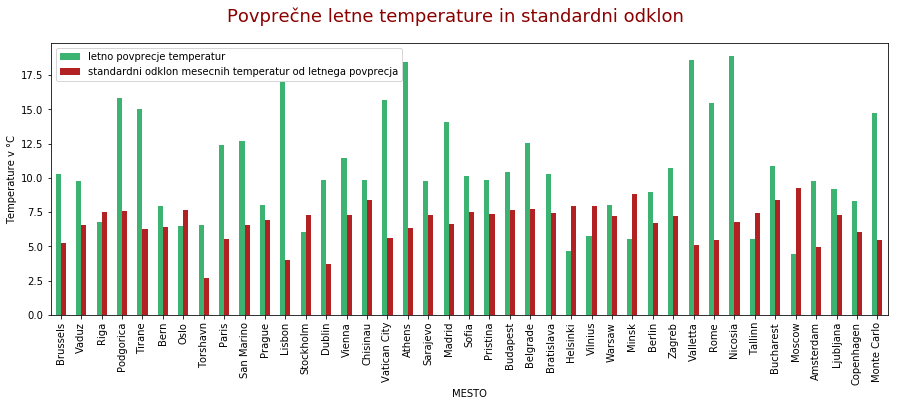

In [54]:
Zdruzena1 = Prestolnice.merge(Ekstremi, on='sifra', how='left')
Zdruzena2 = Zdruzena1.merge(Temperature, on= 'sifra', how='left')
Zdruzena3 = Zdruzena2.set_index('MESTO')
graf1 = Zdruzena3[['letno povprecje temperatur','standardni odklon mesecnih temperatur od letnega povprecja']].plot(kind='bar',color=['mediumseagreen','firebrick'])
graf1.set_ylabel('Temperature v °C')
plt.suptitle('Povprečne letne temperature in standardni odklon',fontsize=18,color='darkred')
plt.show()

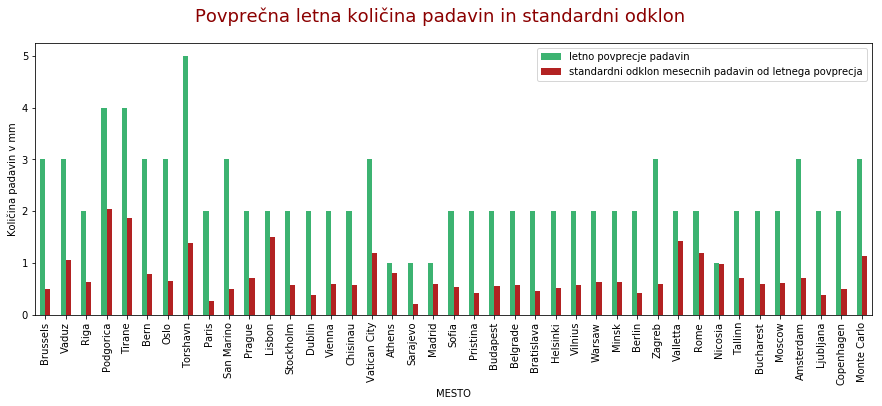

In [55]:
Zdruzena11 = Prestolnice.merge(Ekstremi, on='sifra', how='left')
Zdruzena12 = Zdruzena11.merge(Padavine, on= 'sifra', how='left')
Zdruzena13 = Zdruzena12.set_index('MESTO')
graf2 = Zdruzena13[['letno povprecje padavin','standardni odklon mesecnih padavin od letnega povprecja']].plot(kind='bar',color=['mediumseagreen','firebrick'])
graf2.set_ylabel('Količina padavin v mm')
plt.suptitle('Povprečna letna količina padavin in standardni odklon', fontsize=18,color='darkred')
plt.show()

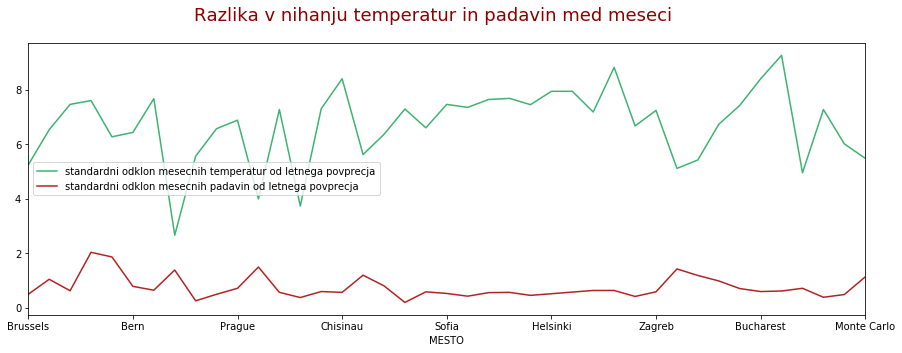

In [56]:
graf3 = Prestolnice.merge(Ekstremi,on='sifra', how='left')
graf3 = graf3.set_index('MESTO')
graf3[['standardni odklon mesecnih temperatur od letnega povprecja','standardni odklon mesecnih padavin od letnega povprecja']].plot(kind='line',color=['mediumseagreen','firebrick'])
plt.suptitle('Razlika v nihanju temperatur in padavin med meseci',fontsize=18, color='darkred')
plt.show()

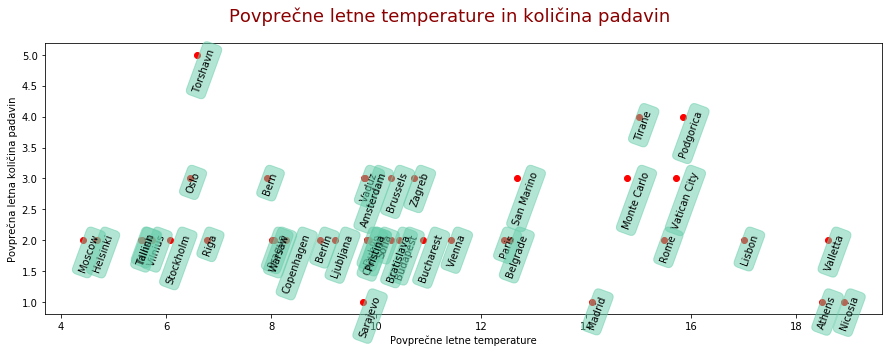

In [35]:
zdruzena = Prestolnice.merge(Temperature,on='sifra', how='left')
zdruzena = zdruzena.merge(Padavine,on='sifra', how='left')

for ime, x, y in zip(Prestolnice['MESTO'], Temperature['letno povprecje temperatur'], Padavine['letno povprecje padavin']):
    plt.plot(x, y, marker='o', color='red')
    plt.annotate(ime, (x - 0.1,y),rotation='70', bbox=dict(boxstyle='round,pad=0.5', color='mediumaquamarine', alpha=0.5))
plt.xlabel('Povprečne letne temperature')
plt.ylabel('Povprečna letna količina padavin')
plt.suptitle('Povprečne letne temperature in količina padavin', fontsize=18,color='darkred')
plt.show()

V spodnji tabeli in grafu so zabeleženi vsi dogodki, ko mesečne temperature padejo pod 0°C. Ker je iz zgornjih dveh tabel razvidno, da temperatura pade pod ledišče le v petih različnih mesecih, obravnavamo le te.

In [58]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.basemap import Basemap
from geopy.geocoders import Nominatim

C:\Program Files\Anaconda3\lib\site-packages\mpl_toolkits\basemap\__init__.py:3274: MatplotlibDeprecationWarning:

The ishold function was deprecated in version 2.0.

C:\Program Files\Anaconda3\lib\site-packages\mpl_toolkits\basemap\__init__.py:3283: MatplotlibDeprecationWarning:

axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.



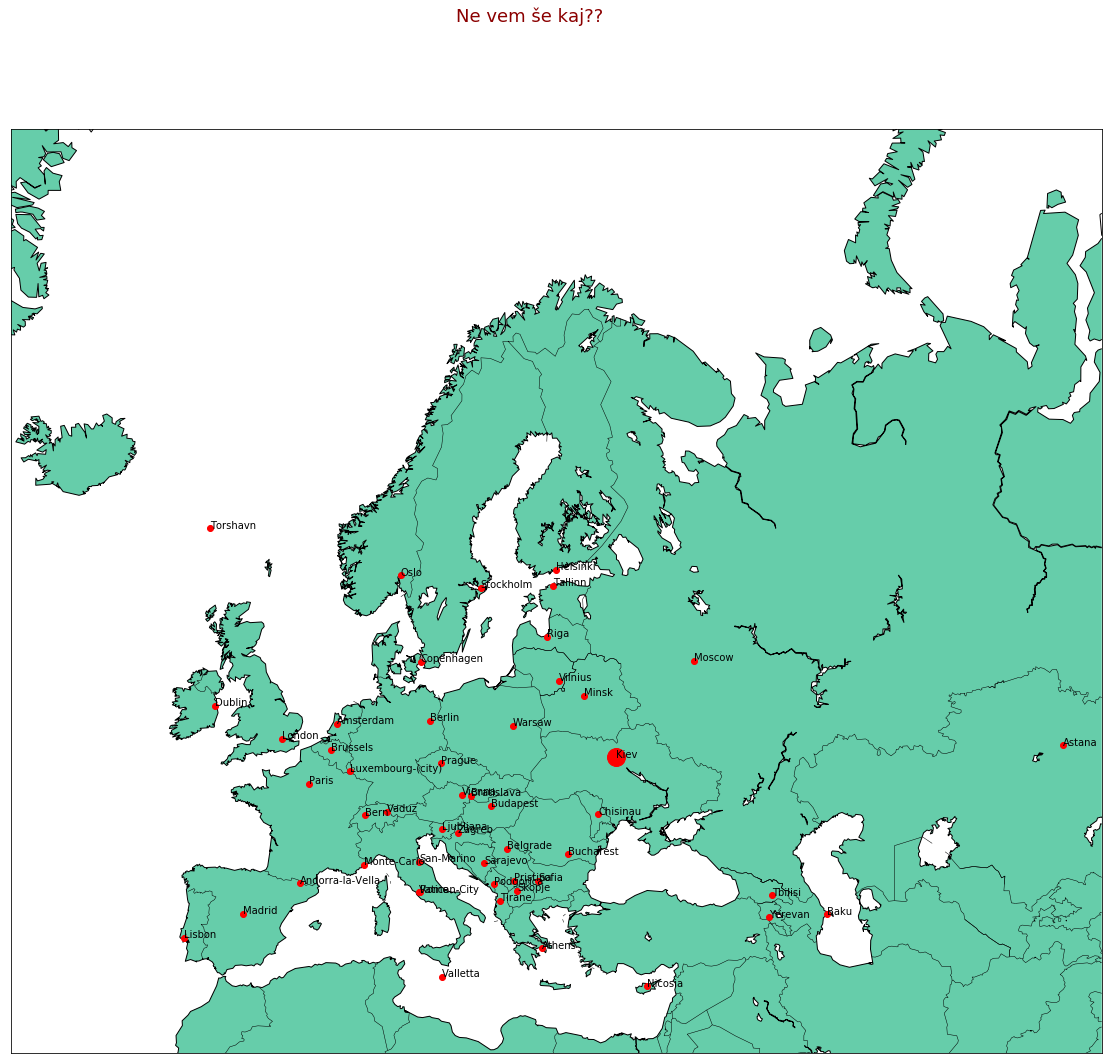

In [59]:
plt.figure(figsize=(30,17))
           
map = Basemap(projection='merc', lat_0=50, lon_0=0,
    resolution = 'l', area_thresh = 1000.0, llcrnrlon=-25, llcrnrlat=30,
    urcrnrlon=75, urcrnrlat=75)
 
map.drawcoastlines()
map.drawcountries()
map.fillcontinents(color='mediumaquamarine')

geolocator = Nominatim()
mestaPoDrzavah = glavna_mesta_drzav()


for mesto in mestaPoDrzavah.values():
    try:
        if mesto == 'Athens':
            x, y = map(23.7333333, 37.9833333)
        else:
            lokacija = geolocator.geocode(mesto)
            x, y = map(lokacija.longitude, lokacija.latitude)
        map.plot(x, y, marker='o', color='Red')
        plt.text(x, y, mesto)                  
    except:
        if 'Kiev' in mesto:
            lokacija = geolocator.geocode('Kiev')
            x, y = map(lokacija.longitude, lokacija.latitude)
            map.plot(x, y, marker='o', color='Red', markersize=18)
            plt.text(x, y, 'Kiev')

plt.suptitle('Ne vem še kaj??', fontsize=18,color='darkred')
plt.show()

## 1.) del: Analiza izbrane države

V prvem delu analize mora uporabnik sam izbrati državo, ki jo želi analizirati. Nato vnese še izbrani mesec in temperaturo. S tem programom nato lahko poišče mesto, ki ima v izbranem mesecu temperaturo najbližjo vnešeni. Najprej prosim zaženi spodnjo funkcijo:

In [60]:
izbrani_mesec, ime_datotekeOsn, ime_datotekeRaz = zazeni_analizaGUI()


    izbrana drzava: Albania 

    izbrani mesec: april 

    izbrana temperatura: 14°C 

    


Spodaj je prikazana osnovna tabela s podatki o temperaturah za posamezno mesto.

In [61]:
osnovni_df = pd.read_csv(ime_datotekeOsn, encoding='latin1', index_col='MESTO')
razlikaTemperatur_df = pd.read_csv(ime_datotekeRaz, encoding='latin1',index_col='MESTO')
priporoceni_df = pd.read_csv("priporoceni.txt", encoding='latin1',index_col='Mesto')

In [62]:
osnovni_df[:]

,Drzava,drsifra,januar,februar,marec,april,maj,junij,julij,avgust,september,oktober,november,december,LETNO POVPRECJE
MESTO,,,,,,,,,,,,,,,
Barc,Albania,136290,0.0,1.7,5.0,7.8,12.8,16.7,18.9,18.9,15.0,10.0,5.6,1.7,9.0
Boric i Math,Albania,136000,3.9,5.6,8.9,12.8,17.8,21.7,23.9,23.9,20.0,15.0,10.0,5.6,14.0
Ceredzias,Albania,136150,5.6,6.7,8.9,12.8,16.7,20.6,22.8,22.8,18.9,15.0,10.6,7.8,14.0
Durres,Albania,11631,8.9,9.4,11.7,14.4,18.9,22.2,25.0,24.4,22.2,18.3,13.3,10.6,16.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Likaj,Albania,592655,10.0,10.0,11.7,13.9,17.8,21.7,24.4,23.9,21.7,17.8,14.4,11.1,16.0
Shkoder,Albania,631,5.6,5.6,7.8,12.8,17.8,21.7,25.0,25.6,21.1,15.6,10.6,6.7,14.0
Tirane,Albania,51631,6.7,7.8,8.3,12.8,17.2,21.7,23.9,24.4,20.6,16.1,12.2,8.3,15.0
Vlore,Albania,136220,8.9,8.9,10.6,13.9,17.8,21.7,23.9,23.9,20.6,16.7,12.8,10.0,15.0


V spodnji tabeli so podatki o temperaturah za izbrani mesec. V stolpcu z imenom "razlika od vnosa" pa se nahajajo vrednosti, ki povedo, za koliko se vnešena temperatura v tem mesecu razlikuje od dejanske. Mesta so urejena naraščajoče po zadnjih vrednostih.

In [63]:
mesec_df = razlikaTemperatur_df[[izbrani_mesec, 'razlika od vnosa','izbrana temperatura']]
razvrsceni_df = mesec_df.sort_values('razlika od vnosa', ascending=True)
razvrsceni_df[:][[izbrani_mesec, 'razlika od vnosa']]

,april,razlika od vnosa
MESTO,,
Fier,13.9,0.1
Likaj,13.9,0.1
Vlore,13.9,0.1
Durres,14.4,0.4
...,...,...
Tirane,12.8,1.2
Gjinokaster,12.2,1.8
Korce,8.9,5.1
Barc,7.8,6.2


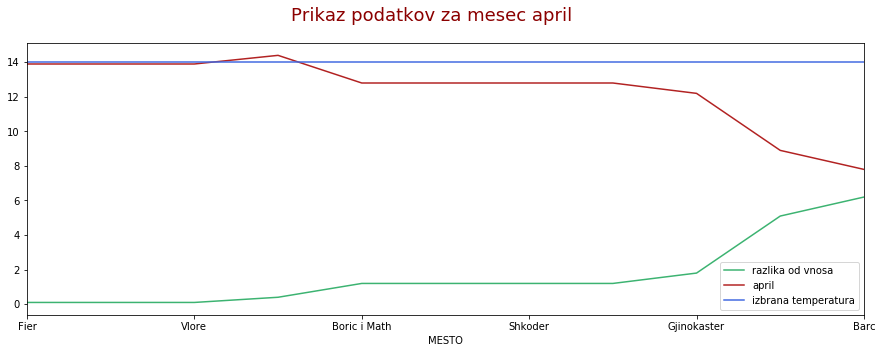

In [68]:
t1 = razvrsceni_df['razlika od vnosa']
t1.colums = ['razlika od vnosa']
t2 = razvrsceni_df[izbrani_mesec]
t2.colums = [izbrani_mesec]
t3 = razvrsceni_df['izbrana temperatura']
t3.colums = ['izbrana temperatura']
zdruzi = pd.concat([t1, t2, t3], axis =1)
zdruzi.plot(color=['mediumseagreen','firebrick','royalblue'])
plt.suptitle('Prikaz podatkov za mesec ' + izbrani_mesec, fontsize=18,color='darkred')
plt.show()

Spodaj je zapisana tabela s podatki, za tri mesta, ki se v izbrani drzavi najbolj priblizajo vašim želenim podatkom.

In [69]:
najblizji3_cela = razlikaTemperatur_df.sort_values('razlika od vnosa', ascending=True)[:3]
najblizji3_cela[:]

,Drzava,drsifra,januar,februar,marec,april,maj,junij,julij,avgust,september,oktober,november,december,LETNO POVPRECJE,razlika od vnosa,izbrana temperatura
MESTO,,,,,,,,,,,,,,,,,
Fier,Albania,592653,10.0,10.0,11.7,13.9,17.8,21.7,24.4,23.9,21.7,17.8,14.4,11.1,16.0,0.1,14
Likaj,Albania,592655,10.0,10.0,11.7,13.9,17.8,21.7,24.4,23.9,21.7,17.8,14.4,11.1,16.0,0.1,14
Vlore,Albania,136220,8.9,8.9,10.6,13.9,17.8,21.7,23.9,23.9,20.6,16.7,12.8,10.0,15.0,0.1,14


Ker se verjetno v večini mest vaša izbrana temperatura kar precej razlikuje od dejanske, vam želim priporočiti boljši vnos podatkov. Če želiš najti mesta v katerih se temperatura od vaše trenutno izbrane razlikuja za manj kot 1°C, vam svetujem, da vnesete enaga izmed mesecoev v spodnji tabeli.

In [70]:
priporoceni_df[:]

,mesec
Mesto,
Vlore,oktober
Durres,oktober
Likaj,oktober
Likaj,oktoberfebruar
Fier,oktober
Fier,oktoberfebruar
Korce,maj


Spodnji graf prikazuje kolikšen delež mest s podobno temperaturo boste našli v posameznem mesecu. Če meseca ni na grafu, potem se v tem mesecu temperatura v nobenem mestu dovolj ne približa izbrani temperaturi.

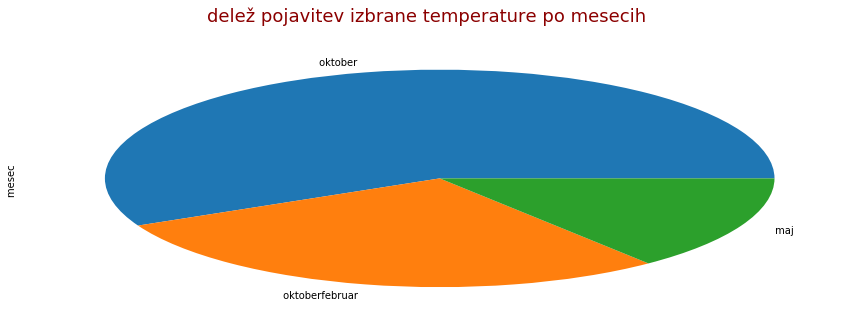

In [75]:
st = priporoceni_df['mesec '].value_counts().plot(kind='pie')
plt.suptitle('delež pojavitev izbrane temperature po mesecih', fontsize=18,color='darkred')
plt.show()